In [33]:
project_id = 'cp100-183410'
dataset_id = 'TEST'
table_id = 'testTable'

### googleapiclient 
- https://developers.google.com/resources/api-libraries/documentation/bigquery/v2/python/latest/

In [34]:
import googleapiclient.discovery

bigQ_API = googleapiclient.discovery.build('bigquery','v2')

#### Create Dataset in BigQuery
- https://cloud.google.com/bigquery/docs/reference/rest/v2/datasets

In [35]:
dataset = bigQ_API.datasets()
dataset.insert(projectId = project_id,
              body = {"datasetReference": {
                                          "projectId": project_id,
                                          "datasetId": dataset_id,
                                        },}).execute()

{u'access': [{u'role': u'WRITER', u'specialGroup': u'projectWriters'},
  {u'role': u'OWNER', u'specialGroup': u'projectOwners'},
  {u'role': u'OWNER',
   u'userByEmail': u'984711767335-compute@developer.gserviceaccount.com'},
  {u'role': u'READER', u'specialGroup': u'projectReaders'}],
 u'creationTime': u'1519976578958',
 u'datasetReference': {u'datasetId': u'TEST', u'projectId': u'cp100-183410'},
 u'etag': u'"OhENgf8ForUUnKbYWWdbr5aJHYs/MTUxOTk3NjU3ODk1OA"',
 u'id': u'cp100-183410:TEST',
 u'kind': u'bigquery#dataset',
 u'lastModifiedTime': u'1519976578958',
 u'location': u'US',
 u'selfLink': u'https://www.googleapis.com/bigquery/v2/projects/cp100-183410/datasets/TEST'}

#### Create Table in BigQuery
- https://cloud.google.com/bigquery/docs/reference/rest/v2/tables#resource
- https://cloud.google.com/bigquery/docs/schemas (Schemas)

In [62]:
table = bigQ_API.tables()
table.insert( projectId = project_id, 
              datasetId = dataset_id,
              body = {"kind": "bigquery#table",
                     "tableReference": { # Required
                                        "projectId": project_id,
                                        "datasetId": dataset_id,
                                        "tableId": table_id,
                                        },
                       "schema": {
                                  "fields": [  # Your Columns
                                    {
                                      "name": "dateCol", # Col 1
                                      "type": "DATE",
                                      "mode": "NULLABLE",
                                      "description": "A column of date YYYY-[M]M-[D]D"
                                    },
                                    {
                                      "name": "structCol", # Col 2
                                      "type": "STRUCT",
                                      "mode": "NULLABLE",
                                      "fields": [
                                          {
                                            "name":"index",
                                            "type":"INTEGER",
                                            "mode":"REQUIRED",
                                            "description":"Integer index without null"
                                          },
                                          {
                                            "name":"value",
                                            "type":"STRING",
                                            "mode":"NULLABLE",
                                            "description":"Value corresponding to index value"
                                          }
                                      ],
                                      "description": "A column of dictionary"
                                    },
                                    {
                                      "name": "arrayCol", # Col 3
                                      "type": "FLOAT64",
                                      "mode": "REPEATED",
                                      "description": "A column of array with floats"
                                    },
                                    {
                                      "name": "repeatedStructCol", # Col 4
                                      "type": "STRUCT",
                                      "mode": "REPEATED",
                                      "fields": [
                                          {
                                            "name":"DatetimeCol",
                                            "type":"DATETIME",
                                            "mode":"REQUIRED",
                                            "description":"Datetime Column YYYY-[M]M-[D]D[( |T)[H]H:[M]M:[S]S[.DDDDDD]]"
                                          },
                                          {
                                            "name":"BooleanCol",
                                            "type":"BOOL",
                                            "mode":"NULLABLE",
                                            "description":"True or False"
                                          }
                                      ],
                                      "description": "A column of dictionary"
                                    },
                                  ]
                              }
                     }).execute()

{u'creationTime': u'1519990452584',
 u'etag': u'"OhENgf8ForUUnKbYWWdbr5aJHYs/MTUxOTk5MDQ1MjU4NA"',
 u'id': u'cp100-183410:TEST.testTable',
 u'kind': u'bigquery#table',
 u'lastModifiedTime': u'1519990452584',
 u'numBytes': u'0',
 u'numLongTermBytes': u'0',
 u'numRows': u'0',
 u'schema': {u'fields': [{u'description': u'A column of date YYYY-[M]M-[D]D',
    u'mode': u'NULLABLE',
    u'name': u'dateCol',
    u'type': u'DATE'},
   {u'description': u'A column of dictionary',
    u'fields': [{u'description': u'Integer index without null',
      u'mode': u'REQUIRED',
      u'name': u'index',
      u'type': u'INTEGER'},
     {u'description': u'Value corresponding to index value',
      u'mode': u'NULLABLE',
      u'name': u'value',
      u'type': u'STRING'}],
    u'mode': u'NULLABLE',
    u'name': u'structCol',
    u'type': u'RECORD'},
   {u'description': u'A column of array with floats',
    u'mode': u'REPEATED',
    u'name': u'arrayCol',
    u'type': u'FLOAT'},
   {u'description': u'A column 

### Insert rows into Bigquery table

In [63]:
## Note Data in buffer stream may not be available in Preview, Query the data with SELECT * FROM `your-dataset` to view 
insert = bigQ_API.tabledata()
insert.insertAll(
              projectId = project_id, 
              datasetId = dataset_id,
              tableId = table_id,
              body = {
                  "kind": "bigquery#tableDataInsertAllRequest",
                  "rows": [
                    {
                      "json": {
                        "dateCol": "2018-03-01",
                        "structCol": {
                          "index": 1,
                          "value": "abc"
                        },
                        "arrayCol": [
                          2.2,
                          4.4,
                          6.6,
                          8.8
                        ],
                        "repeatedStructCol": [
                          {
                            "DatetimeCol": "2018-03-01 00:00:00.000000",
                            "booleanCol": "True"
                          },
                          {
                            "DatetimeCol": "2018-02-28 12:12:12.000000",
                            "booleanCol": "False"
                          }
                        ]
                      }
                    }
                  ]
                }).execute()

{u'kind': u'bigquery#tableDataInsertAllResponse'}

In [3]:
from IPython.display import Image

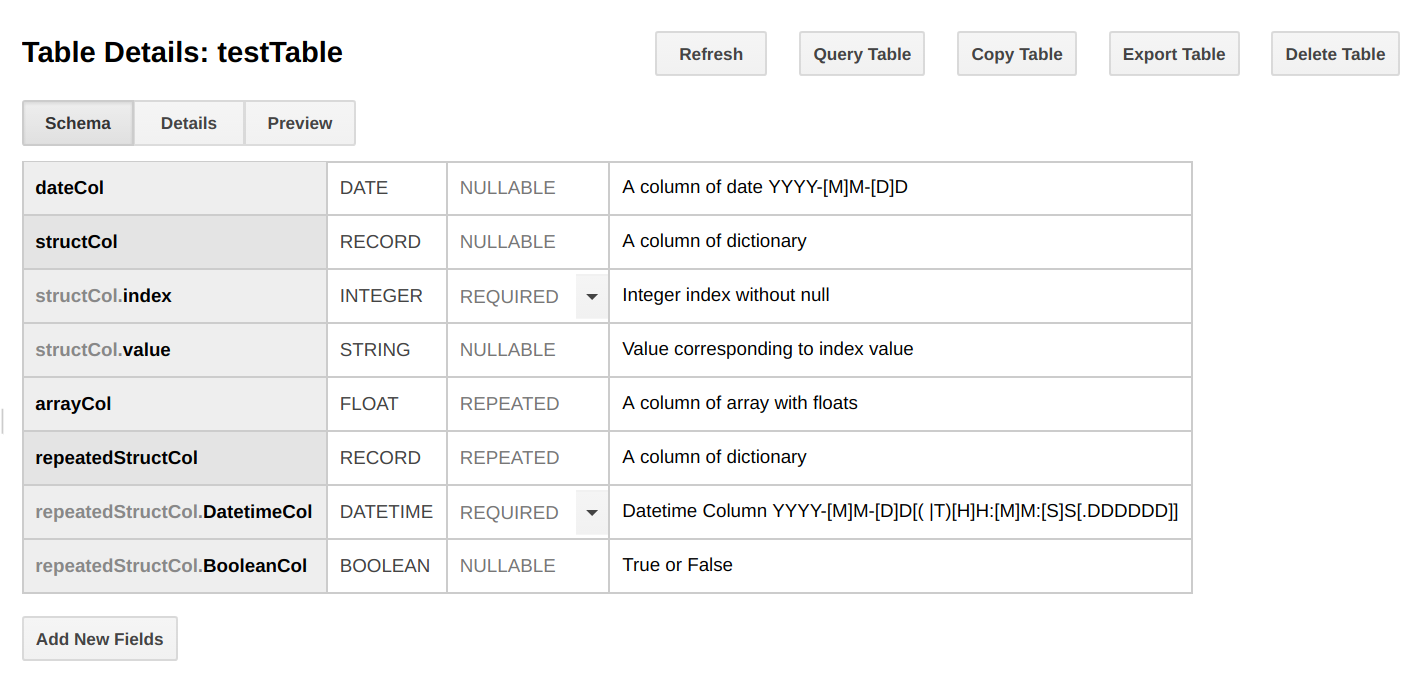

In [4]:
Image('preview1.png')

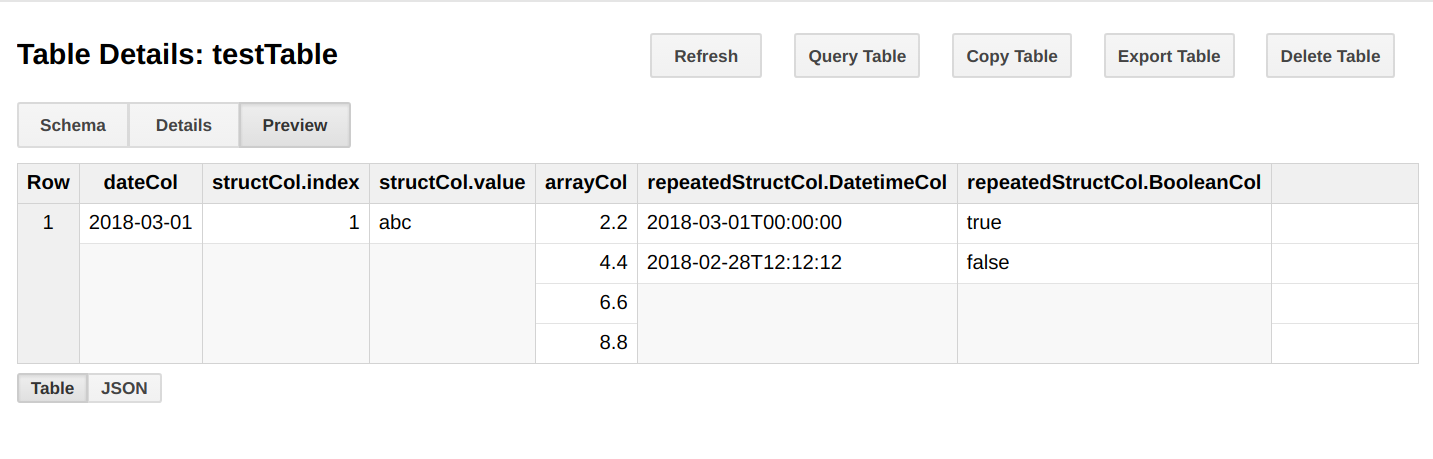

In [5]:
Image('preview2.png')

Note and Reference:
- https://github.com/GoogleCloudPlatform/google-cloud-python/issues/2951